# <a id="top"></a>  📊 Exploratory Data Analysis of ABCDEats Dataset
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

## Objectives
This notebook performs an **Exploratory Data Analysis (EDA)** on the ABCDEats dataset to uncover insights into customer behaviors, spending patterns, and trends that could support strategic decisions. Our analysis aims to:

1. **Summarize Key Statistics**: Calculate and interpret key measures to understand data characteristics.
2. **Identify Trends and Patterns**: Examine promotional effectiveness, payment preferences, regional concentration, and purchasing patterns.
3. **Detect Anomalies**: Highlight outliers or unusual data points that may reveal unique customer segments or operational insights.
4. **Feature Engineering**: Create new features like order frequency and average order value to enhance analysis.
5. **Visualize Findings**: Use charts and graphs to communicate our insights clearly and effectively.

## Index

1. **Exploration of the Dataset**
2. **Summary of Important Statistics**<br>
    >2.1. **Correlation**<br>
    2.2. **Box-Plot**<br>
    2.2.1. **Box-Plots of the Mean of CUI's, DOW's, HR's**<br>
    2.3. **Histograms**<br>
    2.4 **Heatmaps**<br>
3. **Create New Features**
4. **Identify Trends, Patterns, or Anomalies**
5. **Conclusion**

# Imports

In [31]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math
from scipy.stats import chi2_contingency
import numpy as np 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from somoclu import Somoclu
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA   
from sklearn.metrics import silhouette_score
from minisom import MiniSom

**Read the Dataset**

In [33]:
data = pd.read_excel("Numeric_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")

In [34]:
data

,customer_age,product_count,is_chain,first_order,last_order,order_activity_duration,order_frequency,cuisine_diversity,weekend_spending,week_spending,Total_Cuisine_Orders,Asian_Cuisines_Ratio,Western_Cuisines_Ratio
0,0.103448,0.357143,0.166667,0.000000,0.011111,0.111776,0.409836,0.0,0.50,0.0,0.000000,0.200000,0.800000
1,0.068966,0.142857,0.333333,0.000000,0.011111,0.111776,0.213115,1.0,0.50,0.0,0.454137,0.332639,0.667361
2,0.793103,0.142857,0.333333,0.000000,0.011111,0.111776,0.213115,0.5,0.50,0.0,0.217494,0.000000,1.000000
3,0.206897,0.214286,0.166667,0.000000,0.022222,0.121756,0.180328,0.5,0.25,0.1,0.323877,1.000000,0.000000
4,0.172414,0.357143,0.000000,0.000000,0.022222,0.121756,0.245902,1.0,0.25,0.1,0.173428,0.740458,0.259542
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,0.517241,0.071429,0.166667,0.033333,0.000000,0.071856,0.060109,0.0,0.25,0.0,0.000000,0.200000,0.800000
31871,0.420690,0.071429,0.000000,0.062222,0.000000,0.045908,0.070258,0.0,0.25,0.0,0.000000,0.600000,0.400000
31872,0.310345,0.071429,0.166667,0.062222,0.000000,0.045908,0.070258,0.0,0.25,0.0,0.000000,0.400000,0.600000
31873,0.655172,0.071429,0.000000,0.026667,0.000000,0.077844,0.054645,0.5,0.25,0.0,0.284397,1.000000,0.000000


In [35]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
customer_age,31875.0,0.406299,0.196716,0.0,0.275862,0.379310,0.517241,1.0
product_count,31875.0,0.326034,0.237001,0.0,0.142857,0.214286,0.428571,1.0
is_chain,31875.0,0.332762,0.267822,0.0,0.166667,0.333333,0.500000,1.0
first_order,31875.0,0.315396,0.267876,0.0,0.077778,0.244444,0.500000,1.0
last_order,31875.0,0.707471,0.258089,0.0,0.544444,0.777778,0.922222,1.0
order_activity_duration,31875.0,0.453959,0.293918,0.0,0.131737,0.441118,0.720559,1.0
order_frequency,31875.0,0.113411,0.045659,0.0,0.088104,0.091734,0.131148,1.0
cuisine_diversity,31875.0,0.342447,0.335174,0.0,0.000000,0.500000,0.500000,1.0
weekend_spending,31875.0,0.233380,0.239246,0.0,0.000000,0.250000,0.400000,1.0
week_spending,31875.0,0.234576,0.178622,0.0,0.100000,0.200000,0.300000,1.0


CLUSTERING
[⬆️ Back to Top](#top)

TIPOS DE CLUSTERING QUE AFINAL VAMOS USAR

K-MEANS 

SOM - WITH K-MEANS

HIERARCHICAL CLUSTERING - WITH K-MEANS AND SOM

MeanShift 

t-SNE


Group 1: Customer Demographics

customer_age

is_chain

regular_customer

cuisine_loyalty


Group 2: Spending Behavior

weekend_spending

weekday_spending

weekend_spending_ratio

products_per_vendor

region_avg_spending

age_spending_interaction


Group 3: Order Timing & Promotions

first_order

last_order

last_promo

payment_method


Group 4 (Optional): Top-Specific Behavior

top_cuisine_ratio

vendor_count

In [36]:
# Define the groups as subsets of the dataset
group_1 = data[['customer_age', 'is_chain']]  # Customer Demographics
group_2 = data[['weekend_spending', 'week_spending', 'order_frequency']]  # Spending Behavior
group_3 = data[['first_order', 'last_order', 'order_activity_duration']]  # Order Timing & Patterns
group_4 = data[['cuisine_diversity', 'Total_Cuisine_Orders', 'Asian_Cuisines_Ratio', 'Western_Cuisines_Ratio']]  # Cuisine Preferences & Diversity

# Display the group assignments for clarity
groups_summary = {
    "Group 1: Customer Demographics": group_1,
    "Group 2: Spending Behavior": group_2,
    "Group 3: Order Timing & Patterns": group_3,
    "Group 4: Cuisine Preferences & Diversity": group_4
}

groups_summary


{'Group 1: Customer Demographics':        customer_age  is_chain
 0          0.103448  0.166667
 1          0.068966  0.333333
 2          0.793103  0.333333
 3          0.206897  0.166667
 4          0.172414  0.000000
 ...             ...       ...
 31870      0.517241  0.166667
 31871      0.420690  0.000000
 31872      0.310345  0.166667
 31873      0.655172  0.000000
 31874      0.517241  0.000000
 
 [31875 rows x 2 columns],
 'Group 2: Spending Behavior':        weekend_spending  week_spending  order_frequency
 0                  0.50            0.0         0.409836
 1                  0.50            0.0         0.213115
 2                  0.50            0.0         0.213115
 3                  0.25            0.1         0.180328
 4                  0.25            0.1         0.245902
 ...                 ...            ...              ...
 31870              0.25            0.0         0.060109
 31871              0.25            0.0         0.070258
 31872              0.

# Group 1
## K-Means Clustering

**K-Means** is a popular **centroid-based clustering algorithm** that partitions data into **K distinct clusters**. It is simple, efficient, and widely used for customer segmentation, behavior analysis, and more.

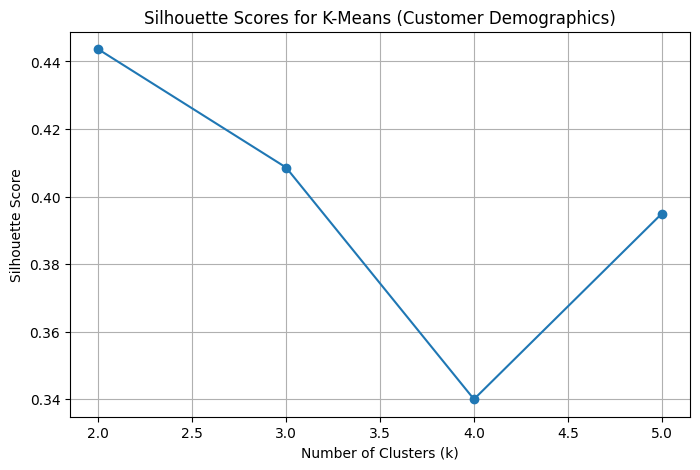

Optimal k: 2, Silhouette Score: 0.4436247077103625


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\332095750.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['kmeans_cluster'] = final_kmeans.fit_predict(group_1)


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []
kmeans_labels_dict = {}  # Dictionary to store labels for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_1)
    score = silhouette_score(group_1, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Customer Demographics)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_1['kmeans_cluster'] = final_kmeans.fit_predict(group_1)

SOM with K-Means

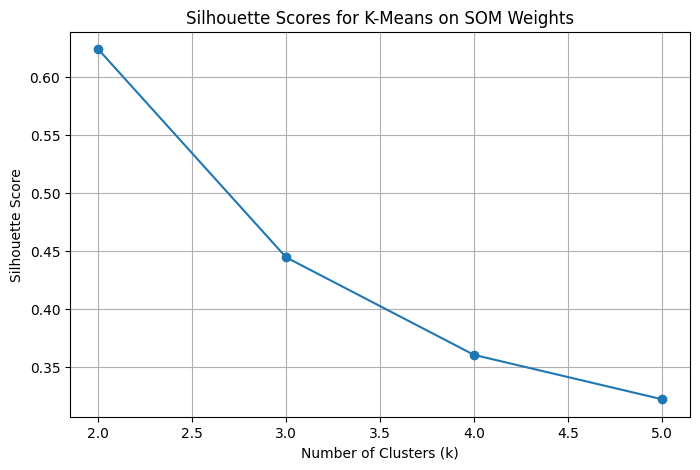

Optimal k: 2, Silhouette Score: 0.6240


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\1393095248.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['som_cluster'] = data_som_clusters  # Save labels in the dataset


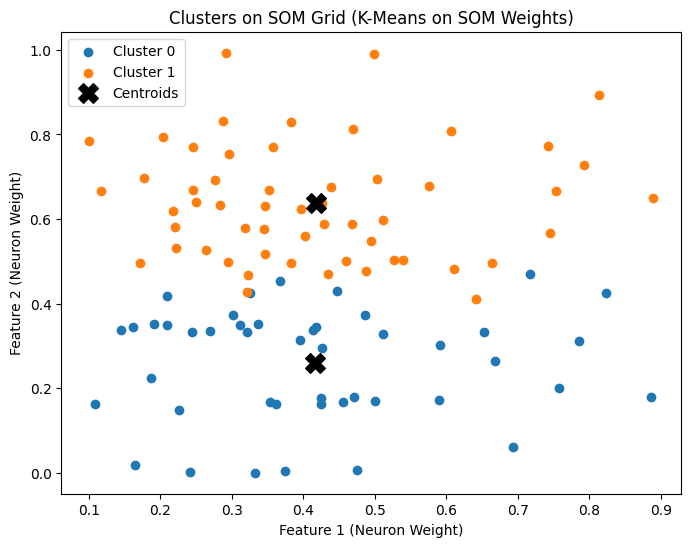

Cluster Summary:
             customer_age  is_chain  kmeans_cluster
som_cluster                                        
0                0.405894  0.168606             1.0
1                0.407078  0.649047             0.0


In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)  # Initialize weights randomly
som.train_random(data=group_1.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_1.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_1['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_1.groupby('som_cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

## Hierarchical clustering combined with SOM and K-means


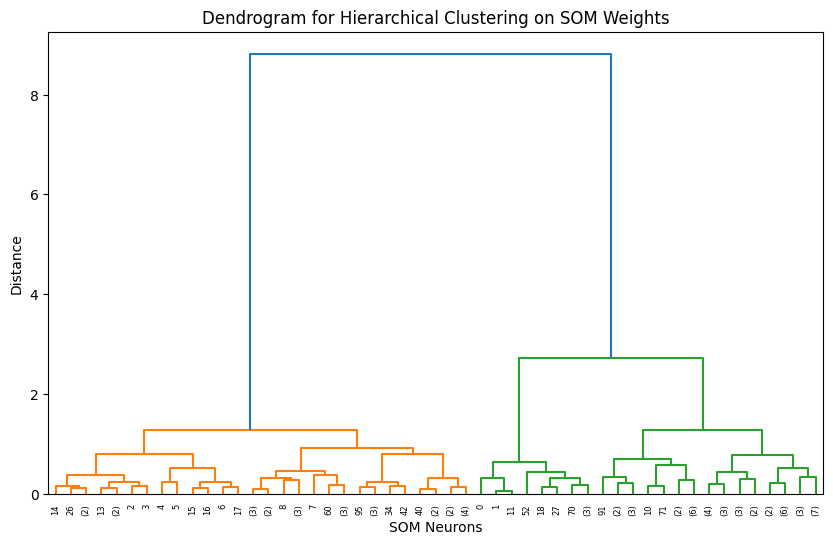

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\3416056465.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset


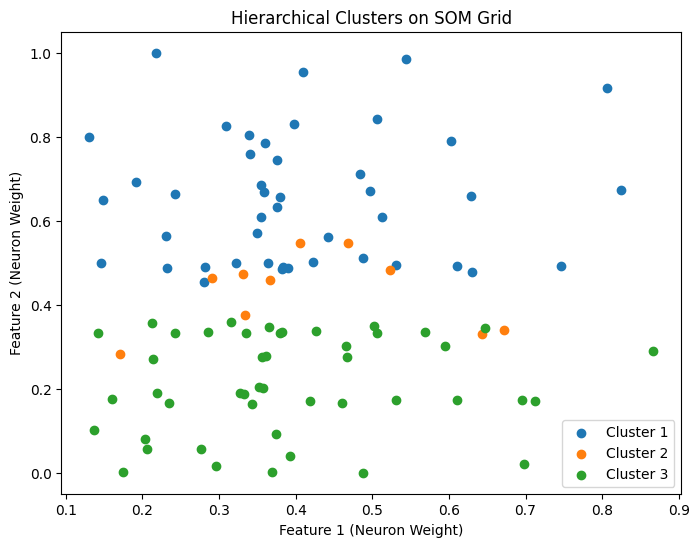

Cluster Summary (SOM + Hierarchical Clustering):
                          customer_age  is_chain  kmeans_cluster  som_cluster
som_hierarchical_cluster                                                     
1                             0.407078  0.649047             0.0          1.0
3                             0.405894  0.168606             1.0          0.0


In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)
som.train_random(group_1.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Extract the cluster labels for optimal k
optimal_k = 3  # You can adjust this based on the dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_1.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add hierarchical cluster labels to the dataset
group_1['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset

# Step 5: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
hierarchical_summary = group_1.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(hierarchical_summary)

MeanShift Algorithm

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\1882815833.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['mean_shift_cluster'] = mean_shift.fit_predict(group_1)


Group 1 (Customer Demographics) - Number of clusters identified by MeanShift: 2


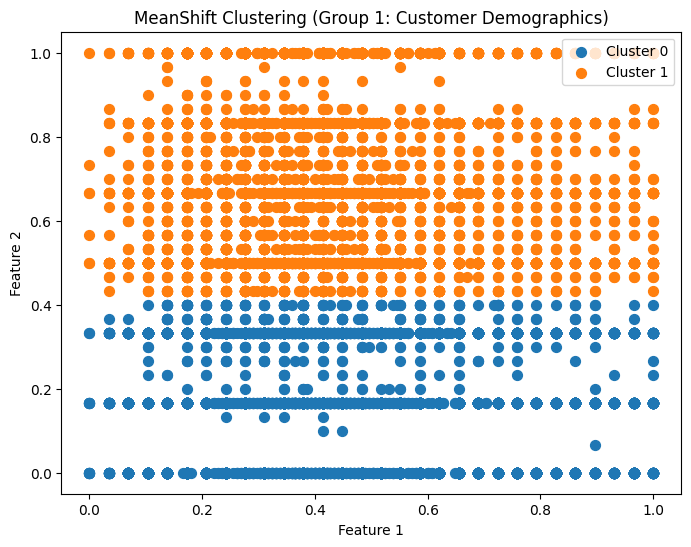

In [40]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

# Estimate bandwidth
bandwidth = estimate_bandwidth(group_1, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
group_1['mean_shift_cluster'] = mean_shift.fit_predict(group_1)

# Count clusters
n_clusters = len(np.unique(group_1['mean_shift_cluster']))
print(f"Group 1 (Customer Demographics) - Number of clusters identified by MeanShift: {n_clusters}")

# Plot MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_1['mean_shift_cluster']):
    cluster_points = group_1[group_1['mean_shift_cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 1: Customer Demographics)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Analysis MeanShift

DBSCAN

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\773226027.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['dbscan_cluster'] = dbscan.fit_predict(group_1)


Group 1 (Customer Demographics) - Number of clusters identified by DBSCAN: 2


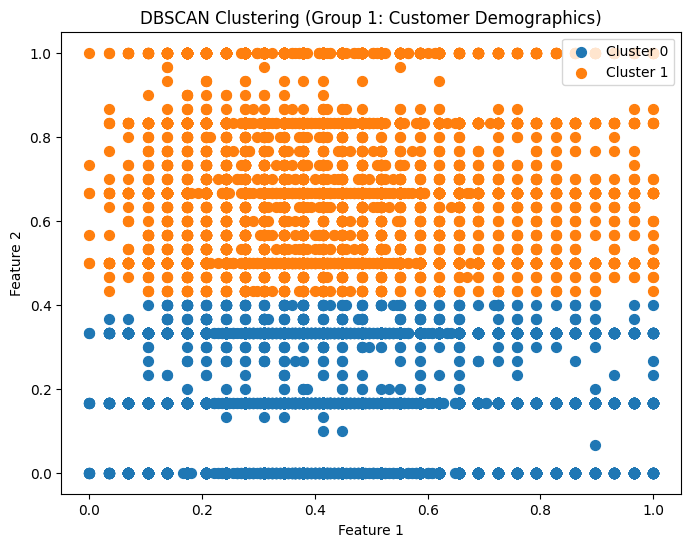

In [41]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Parameters for DBSCAN
eps = 0.5
min_samples = 5

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_1['dbscan_cluster'] = dbscan.fit_predict(group_1)

# Count clusters (excluding noise)
n_clusters = len(np.unique(group_1['dbscan_cluster'])) - (1 if -1 in group_1['dbscan_cluster'] else 0)
print(f"Group 1 (Customer Demographics) - Number of clusters identified by DBSCAN: {n_clusters}")

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_1['dbscan_cluster']):
    if cluster == -1:
        cluster_points = group_1[group_1['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_1[group_1['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 1: Customer Demographics)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


t-SNE

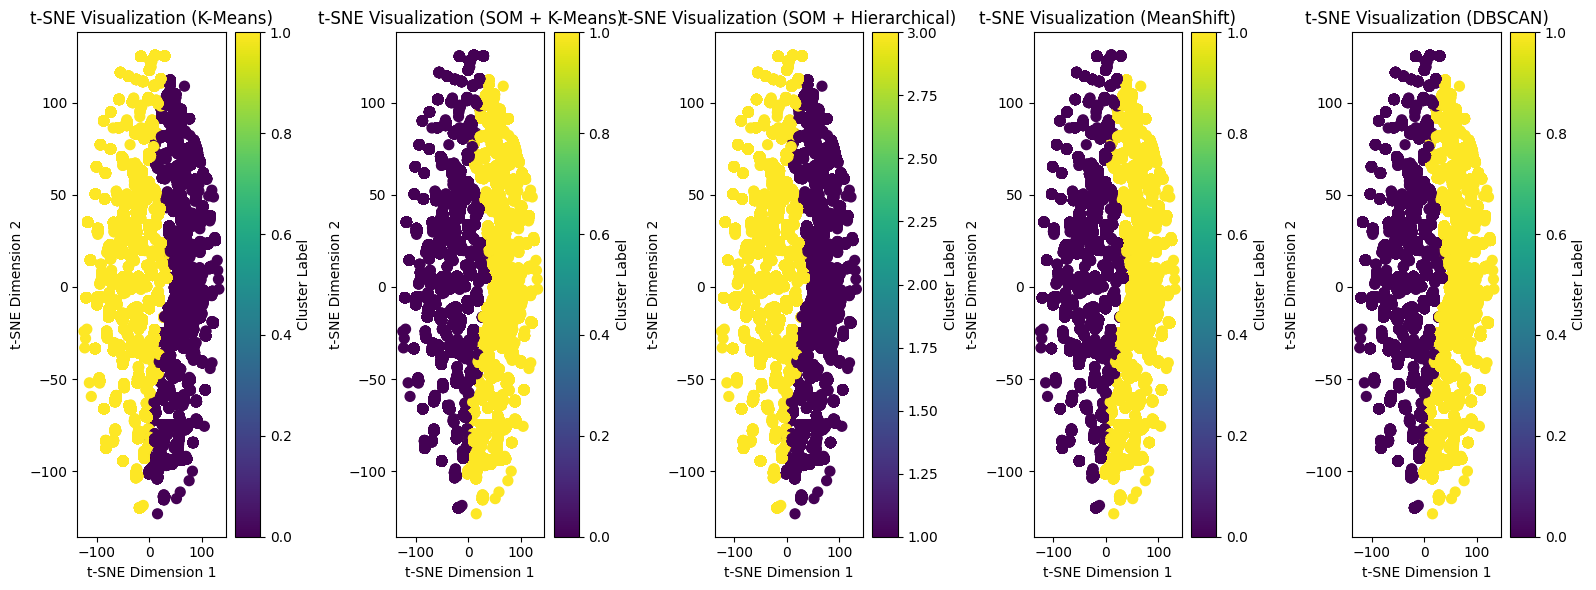

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Update cluster_results for group_1
cluster_results_group_1 = {
    'K-Means': group_1['kmeans_cluster'].values,
    'SOM + K-Means': group_1['som_cluster'].values,
    'SOM + Hierarchical': group_1['som_hierarchical_cluster'].values,
    'MeanShift': group_1['mean_shift_cluster'].values,
    'DBSCAN': group_1['dbscan_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_1_tsne = tsne.fit_transform(group_1.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_1), figsize=(16, 6))
if len(cluster_results_group_1) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_1.items()):
    scatter = axes[i].scatter(group_1_tsne[:, 0], group_1_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()


Analysis t-SNE

# Group 2
## K-Means Clustering

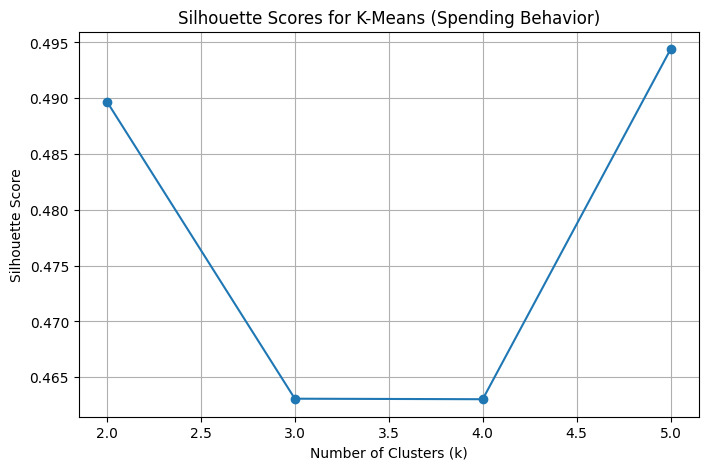

Optimal k: 5, Silhouette Score: 0.4943963184727486


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\3032338430.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['kmeans_cluster'] = final_kmeans.fit_predict(group_2)


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []
kmeans_labels_dict = {}  # Dictionary to store labels for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_2)
    score = silhouette_score(group_2, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Spending Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_2['kmeans_cluster'] = final_kmeans.fit_predict(group_2)

SOM with K-Means

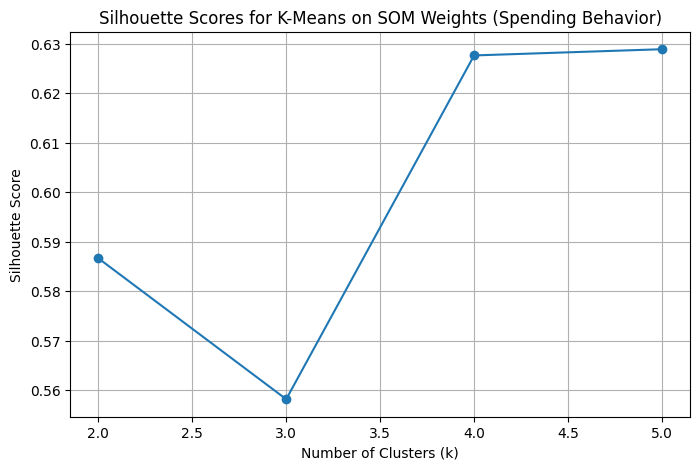

Optimal k: 5, Silhouette Score: 0.6289


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\2163527077.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['som_cluster'] = data_som_clusters  # Save labels in the dataset


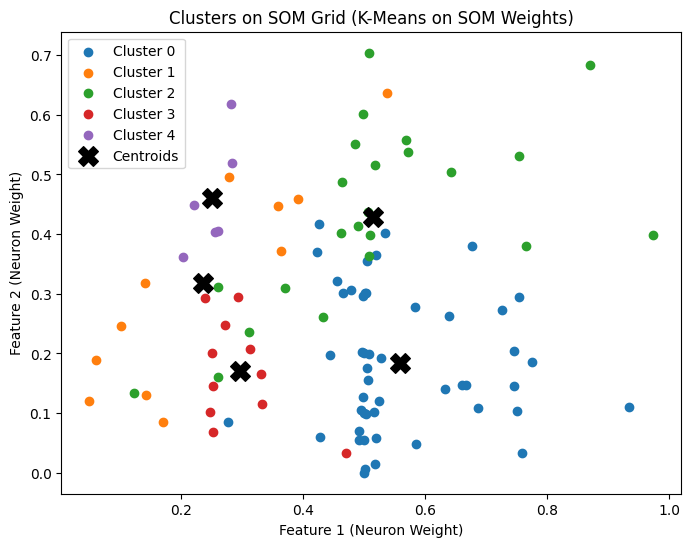

Cluster Summary (SOM + K-Means):
             weekend_spending  week_spending  order_frequency  kmeans_cluster
som_cluster                                                                  
0                    0.551420       0.161445         0.096731             1.0
1                    0.000760       0.168815         0.134173             3.0
2                    0.619117       0.534154         0.092198             2.0
3                    0.250504       0.133619         0.112674             0.0
4                    0.149555       0.482023         0.092348             4.0


In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)  # Initialize weights randomly
som.train_random(data=group_2.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_2.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights (Spending Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_2.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_2['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_2.groupby('som_cluster').mean()
print("Cluster Summary (SOM + K-Means):")
print(cluster_summary)


Hierarchical clustering with SOM

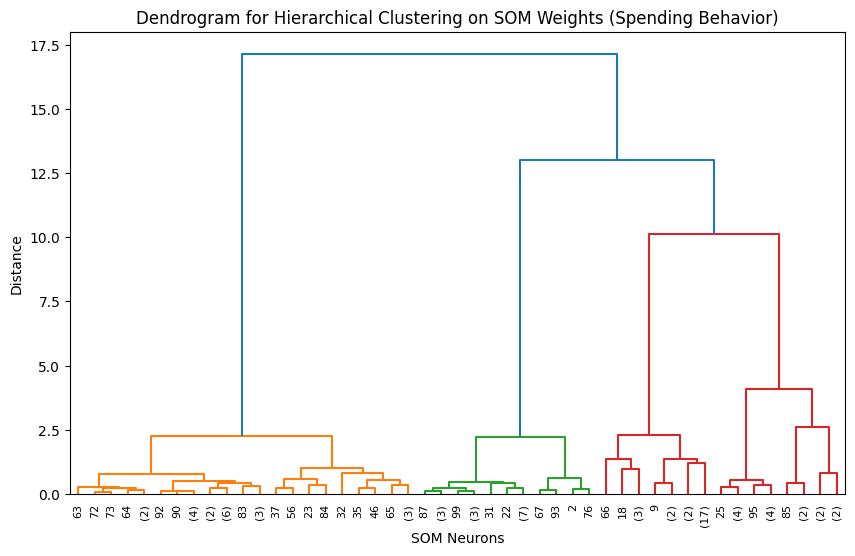

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\199815796.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset


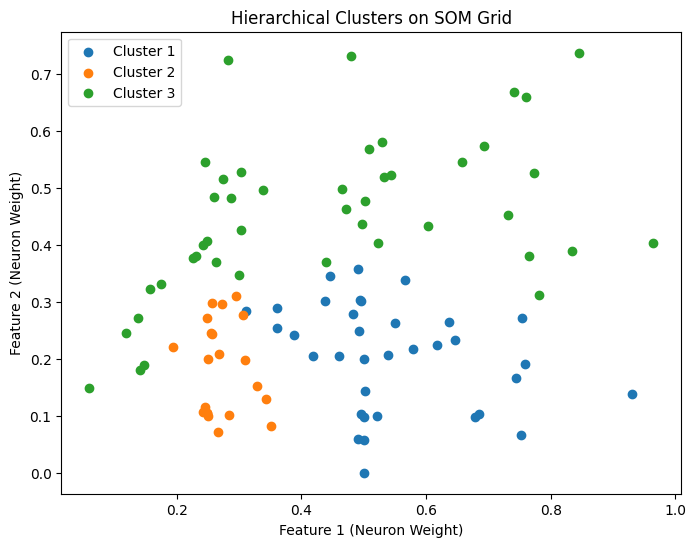

Cluster Summary (SOM + Hierarchical Clustering):
                          weekend_spending  week_spending  order_frequency  \
som_hierarchical_cluster                                                     
1                                 0.551420       0.161445         0.096731   
2                                 0.250504       0.133619         0.112674   
3                                 0.148111       0.301084         0.117804   

                          kmeans_cluster  som_cluster  
som_hierarchical_cluster                               
1                               1.000000     0.000000  
2                               0.000000     3.000000  
3                               3.010664     1.792021  


In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)
som.train_random(group_2.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_2.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Spending Behavior)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Extract the cluster labels for optimal k
optimal_k = 3  # You can adjust this based on the dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_2.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add hierarchical cluster labels to the dataset
group_2['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset

# Step 5: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
hierarchical_summary = group_2.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(hierarchical_summary)


Meanshift

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\374624837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['mean_shift_cluster'] = mean_shift.fit_predict(group_2)


Group 2 (Spending Behavior) - Number of clusters identified by MeanShift: 5


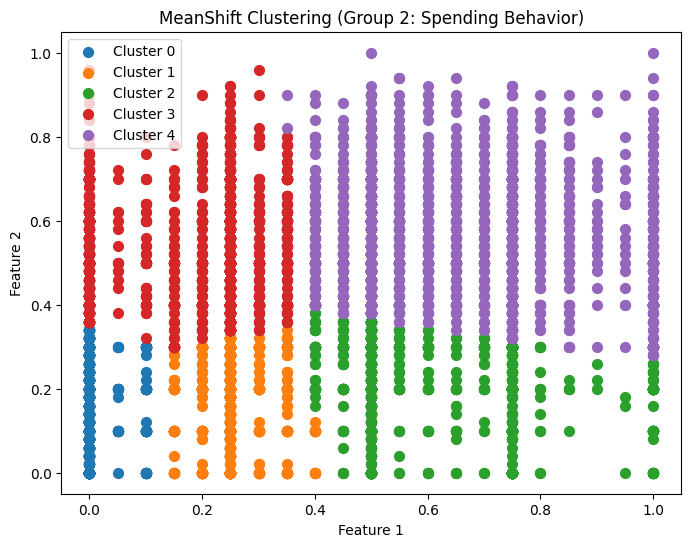

In [46]:
# Estimate bandwidth
bandwidth = estimate_bandwidth(group_2, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
group_2['mean_shift_cluster'] = mean_shift.fit_predict(group_2)

# Count clusters
n_clusters = len(np.unique(group_2['mean_shift_cluster']))
print(f"Group 2 (Spending Behavior) - Number of clusters identified by MeanShift: {n_clusters}")

# Plot MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_2['mean_shift_cluster']):
    cluster_points = group_2[group_2['mean_shift_cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 2: Spending Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

DBSCAN

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\3616502511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['dbscan_cluster'] = dbscan.fit_predict(group_2)


Group 2 (Spending Behavior) - Number of clusters identified by DBSCAN: 5


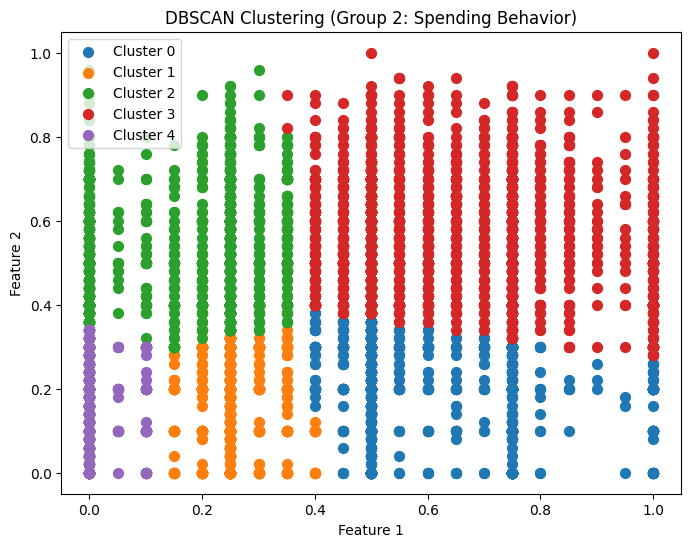

In [47]:
# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_2['dbscan_cluster'] = dbscan.fit_predict(group_2)

# Count clusters (excluding noise)
n_clusters = len(np.unique(group_2['dbscan_cluster'])) - (1 if -1 in group_2['dbscan_cluster'] else 0)
print(f"Group 2 (Spending Behavior) - Number of clusters identified by DBSCAN: {n_clusters}")

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_2['dbscan_cluster']):
    if cluster == -1:
        cluster_points = group_2[group_2['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_2[group_2['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 2: Spending Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


t-SNE

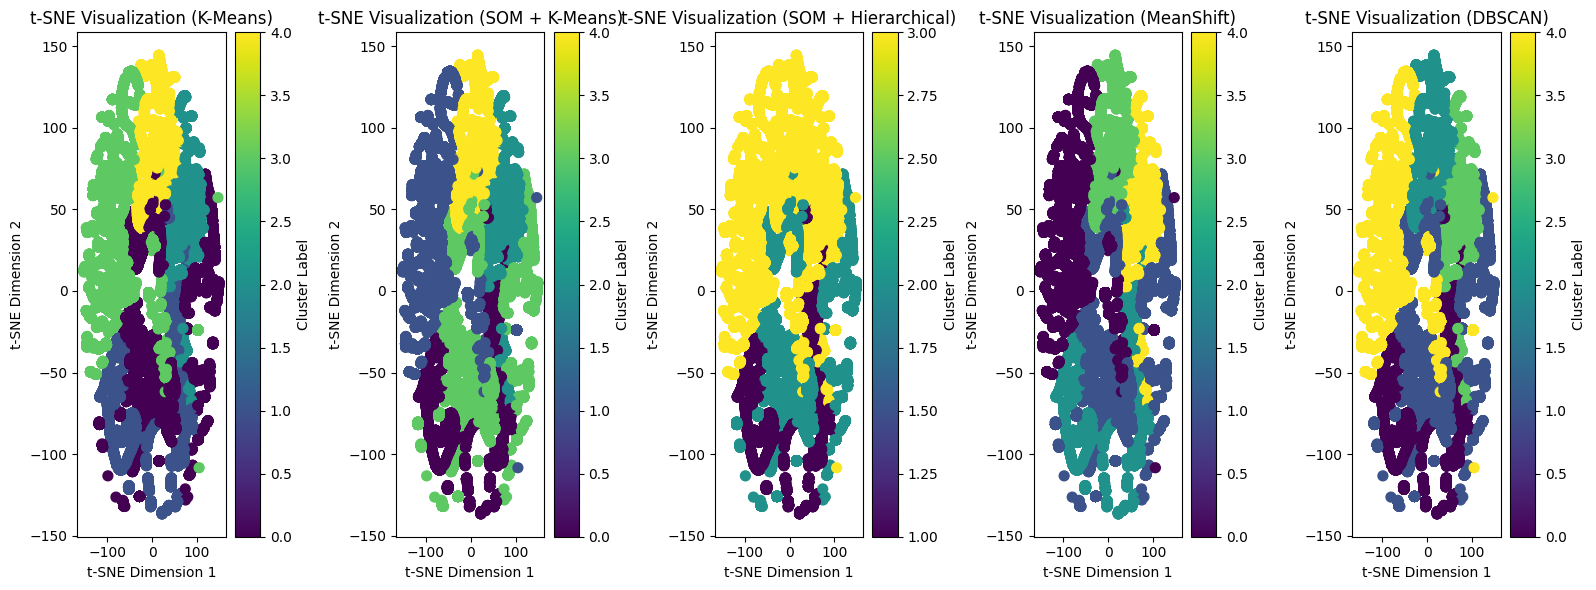

In [48]:
# Update cluster_results for group_2
# Update cluster_results for group_1
cluster_results_group_2 = {
    'K-Means': group_2['kmeans_cluster'].values,
    'SOM + K-Means': group_2['som_cluster'].values,
    'SOM + Hierarchical': group_2['som_hierarchical_cluster'].values,
    'MeanShift': group_2['mean_shift_cluster'].values,
    'DBSCAN': group_2['dbscan_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_2_tsne = tsne.fit_transform(group_2.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_2), figsize=(16, 6))
if len(cluster_results_group_2) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_2.items()):
    scatter = axes[i].scatter(group_2_tsne[:, 0], group_2_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()


Group 3

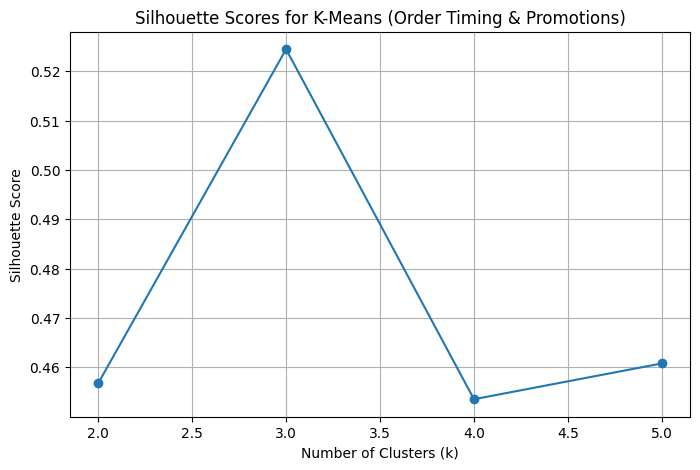

Optimal k: 3, Silhouette Score: 0.5244442965534277


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\2935861292.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['kmeans_cluster'] = final_kmeans.fit_predict(group_3)


In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []
kmeans_labels_dict = {}  # Dictionary to store labels for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_3)
    score = silhouette_score(group_3, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Order Timing & Promotions)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_3['kmeans_cluster'] = final_kmeans.fit_predict(group_3)

SOM with K-Means

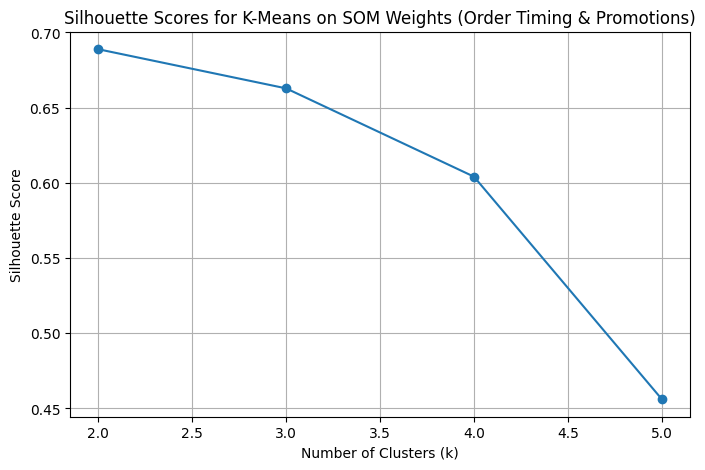

Optimal k: 2, Silhouette Score: 0.6888


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\2830711647.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['som_cluster'] = data_som_clusters  # Save labels in the dataset


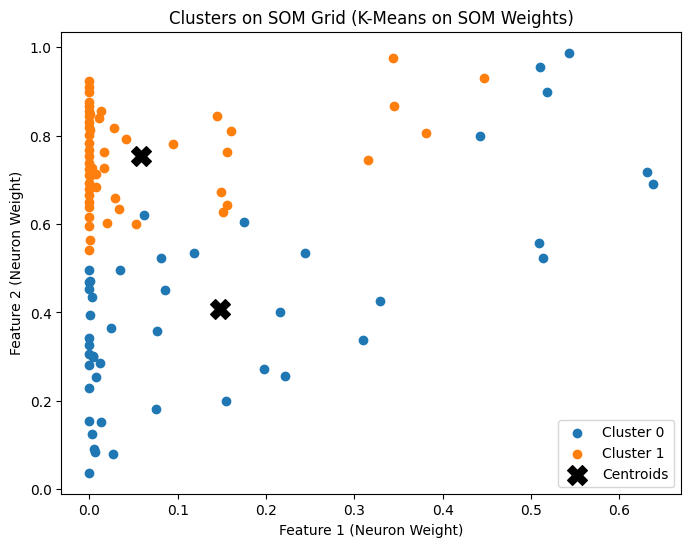

Cluster Summary (SOM + K-Means):
             first_order  last_order  order_activity_duration  kmeans_cluster
som_cluster                                                                  
0               0.453747    0.582713                 0.217634        1.469802
1               0.148349    0.858105                 0.739301        0.000000


In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)  # Initialize weights randomly
som.train_random(data=group_3.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_3.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights (Order Timing & Promotions)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_3.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_3['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_3.groupby('som_cluster').mean()
print("Cluster Summary (SOM + K-Means):")
print(cluster_summary)


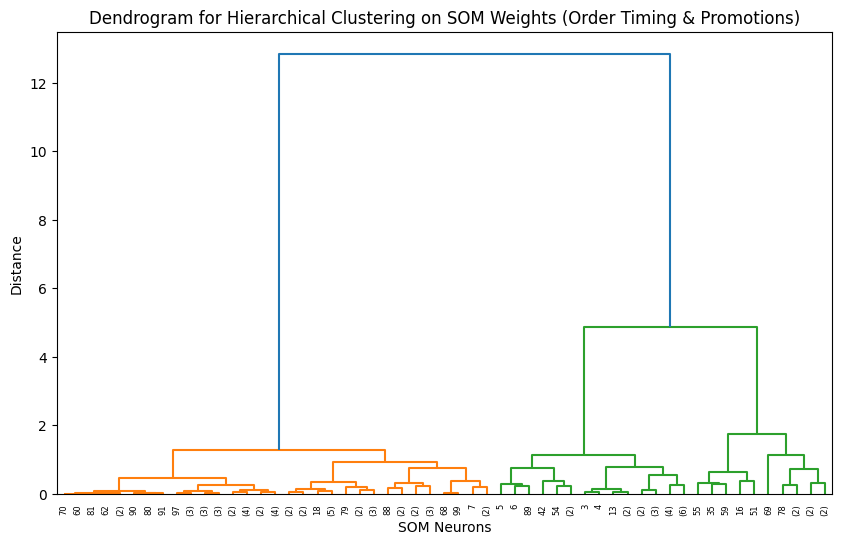

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\1321717307.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset


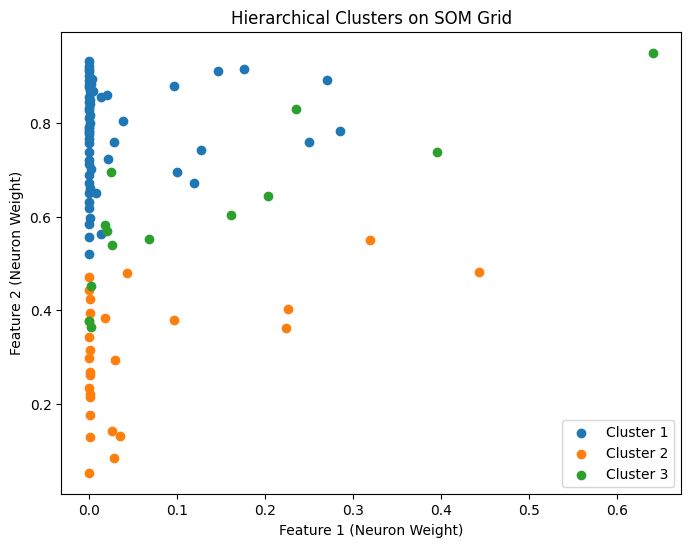

Cluster Summary (SOM + Hierarchical Clustering):
                          first_order  last_order  order_activity_duration  \
som_hierarchical_cluster                                                     
1                            0.148349    0.858105                 0.739301   
2                            0.208832    0.335357                 0.215442   
3                            0.670764    0.801892                 0.219576   

                          kmeans_cluster  som_cluster  
som_hierarchical_cluster                               
1                                    0.0          1.0  
2                                    2.0          0.0  
3                                    1.0          0.0  


In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)
som.train_random(group_3.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_3.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Order Timing & Promotions)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Extract the cluster labels for optimal k
optimal_k = 3  # You can adjust this based on the dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_3.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add hierarchical cluster labels to the dataset
group_3['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset

# Step 5: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
hierarchical_summary = group_3.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(hierarchical_summary)

MeanShift

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\1956416928.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['mean_shift_cluster'] = mean_shift.fit_predict(group_3)


Group 3 (Order Timing & Patterns) - Number of clusters identified by MeanShift: 3


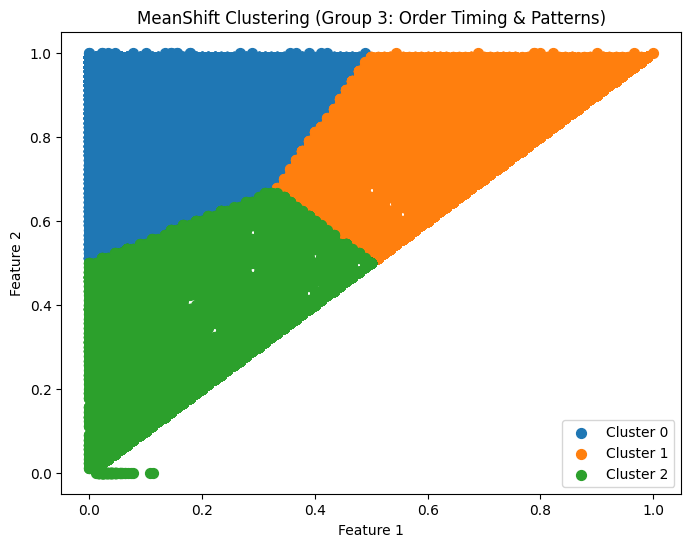

In [52]:
# Estimate bandwidth
bandwidth = estimate_bandwidth(group_3, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
group_3['mean_shift_cluster'] = mean_shift.fit_predict(group_3)

# Count clusters
n_clusters = len(np.unique(group_3['mean_shift_cluster']))
print(f"Group 3 (Order Timing & Patterns) - Number of clusters identified by MeanShift: {n_clusters}")

# Plot MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_3['mean_shift_cluster']):
    cluster_points = group_3[group_3['mean_shift_cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 3: Order Timing & Patterns)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


DBSCAN

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\1850249490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['dbscan_cluster'] = dbscan.fit_predict(group_3)


Group 3 (Order Timing & Patterns) - Number of clusters identified by DBSCAN: 3


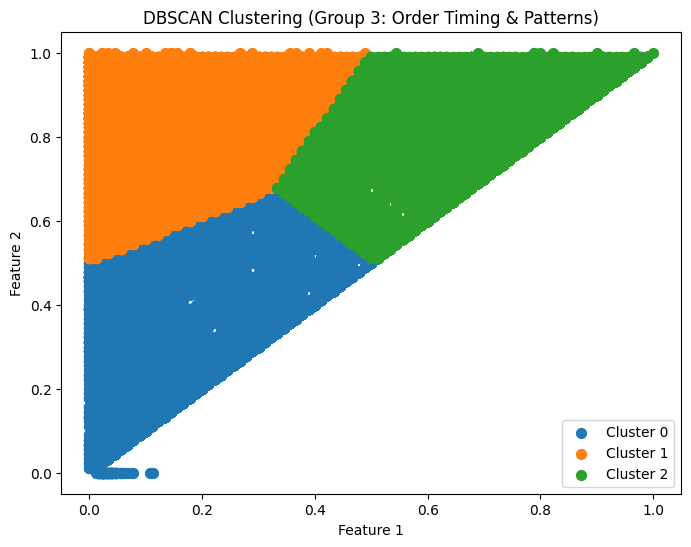

In [53]:
# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_3['dbscan_cluster'] = dbscan.fit_predict(group_3)

# Count clusters (excluding noise)
n_clusters = len(np.unique(group_3['dbscan_cluster'])) - (1 if -1 in group_3['dbscan_cluster'] else 0)
print(f"Group 3 (Order Timing & Patterns) - Number of clusters identified by DBSCAN: {n_clusters}")

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_3['dbscan_cluster']):
    if cluster == -1:
        cluster_points = group_3[group_3['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_3[group_3['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 3: Order Timing & Patterns)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


t-SNE

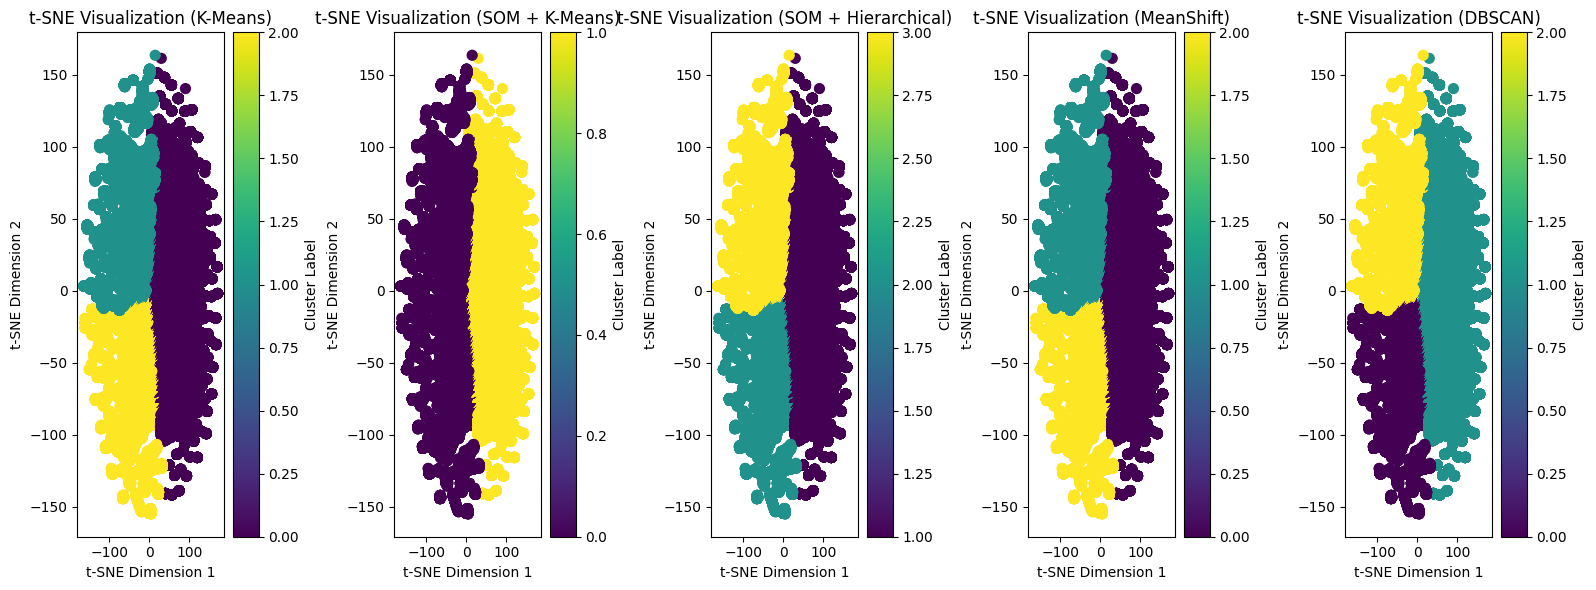

In [54]:
# Update cluster_results for group_3
# Update cluster_results for group_1
cluster_results_group_3 = {
    'K-Means': group_3['kmeans_cluster'].values,
    'SOM + K-Means': group_3['som_cluster'].values,
    'SOM + Hierarchical': group_3['som_hierarchical_cluster'].values,
    'MeanShift': group_3['mean_shift_cluster'].values,
    'DBSCAN': group_3['dbscan_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_3_tsne = tsne.fit_transform(group_3.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_3), figsize=(16, 6))
if len(cluster_results_group_3) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_3.items()):
    scatter = axes[i].scatter(group_3_tsne[:, 0], group_3_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()


Group 4

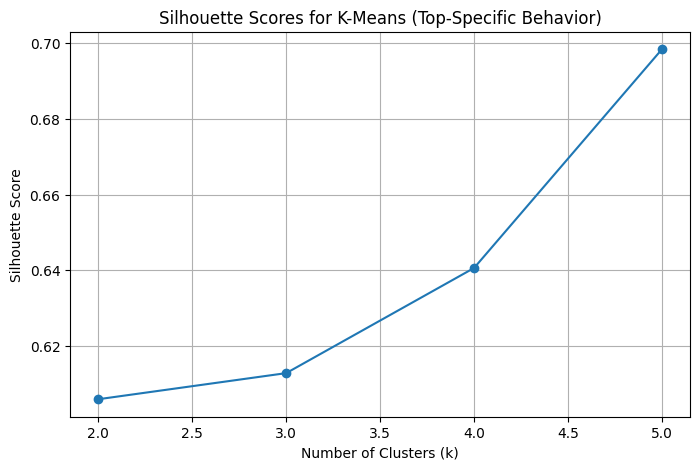

Optimal k: 5, Silhouette Score: 0.6984054714060952


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\3247161007.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['kmeans_cluster'] = final_kmeans.fit_predict(group_4)


In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []
kmeans_labels_dict = {}  # Dictionary to store labels for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_4)
    score = silhouette_score(group_4, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Top-Specific Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_4['kmeans_cluster'] = final_kmeans.fit_predict(group_4)


SOM with K-Means

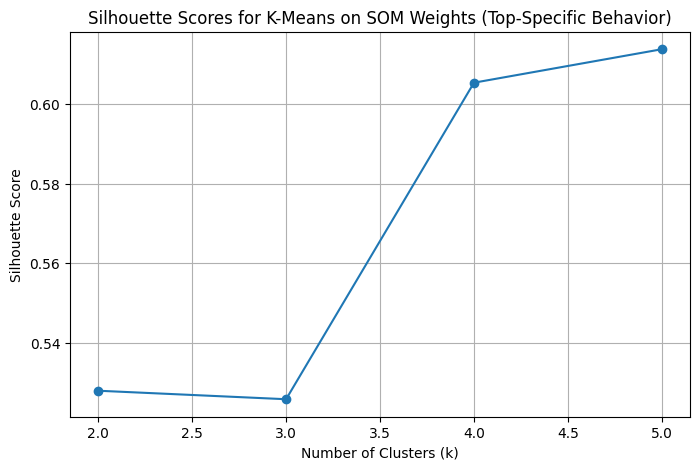

Optimal k: 5, Silhouette Score: 0.6138


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\469235045.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['som_cluster'] = data_som_clusters  # Save labels in the dataset


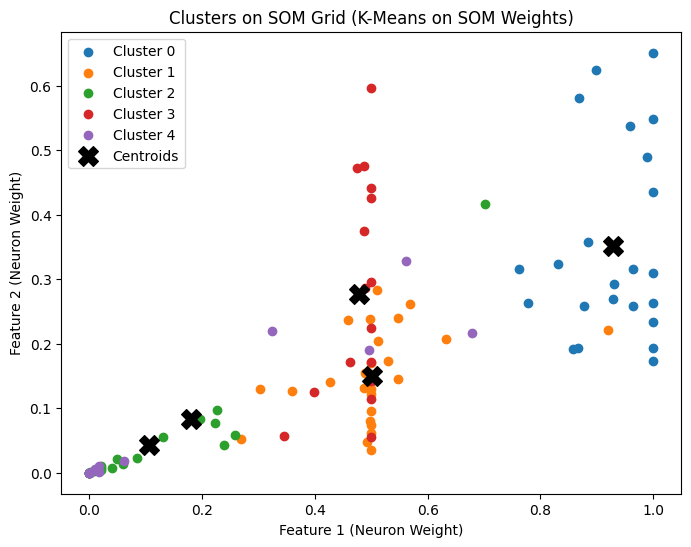

Cluster Summary (SOM + K-Means):
             cuisine_diversity  Total_Cuisine_Orders  Asian_Cuisines_Ratio  \
som_cluster                                                                  
0                     1.000000              0.391368              0.612738   
1                     0.513852              0.131672              0.004036   
2                     0.000000              0.000000              0.131022   
3                     0.496282              0.261148              0.999961   
4                     0.000000              0.000000              0.488190   

             Western_Cuisines_Ratio  kmeans_cluster  
som_cluster                                          
0                          0.387262             4.0  
1                          0.995964             0.0  
2                          0.868978             2.0  
3                          0.000039             1.0  
4                          0.511810             3.0  


In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_4.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_4.values)  # Initialize weights randomly
som.train_random(data=group_4.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_4.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights (Top-Specific Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_4.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_4['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_4.groupby('som_cluster').mean()
print("Cluster Summary (SOM + K-Means):")
print(cluster_summary)


Hierarchical Clustering + SOM

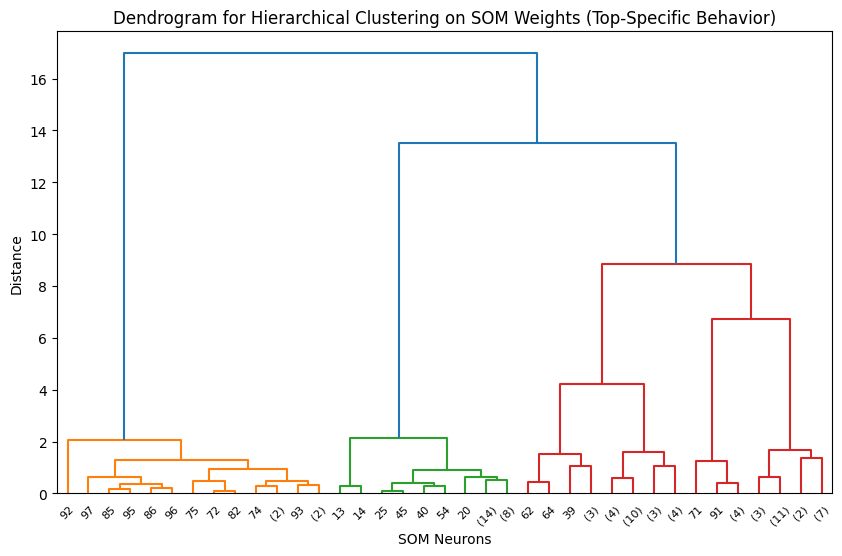

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\233104275.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset


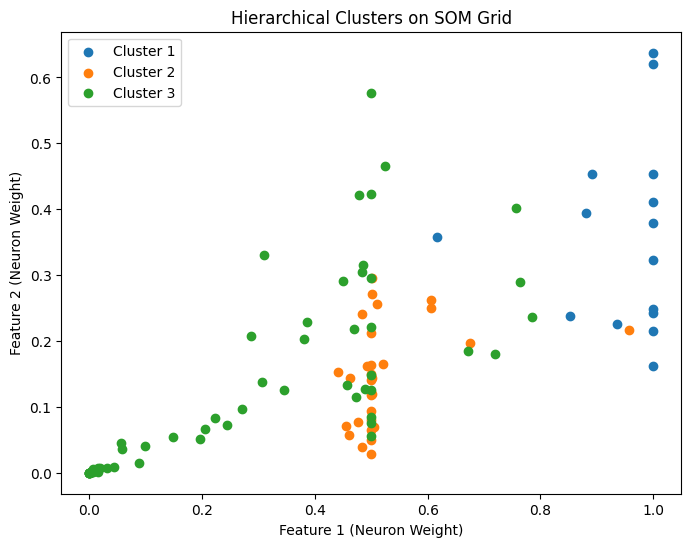

Cluster Summary (SOM + Hierarchical Clustering):
                          cuisine_diversity  Total_Cuisine_Orders  \
som_hierarchical_cluster                                            
1                                  1.000000              0.391368   
2                                  0.513852              0.131672   
3                                  0.182014              0.095777   

                          Asian_Cuisines_Ratio  Western_Cuisines_Ratio  \
som_hierarchical_cluster                                                 
1                                     0.612738                0.387262   
2                                     0.004036                0.995964   
3                                     0.545717                0.454283   

                          kmeans_cluster  som_cluster  
som_hierarchical_cluster                               
1                               4.000000     0.000000  
2                               0.000000     1.000000  
3         

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_4.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_4.values)
som.train_random(group_4.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_4.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Top-Specific Behavior)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Extract the cluster labels for optimal k
optimal_k = 3  # You can adjust this based on the dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_4.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add hierarchical cluster labels to the dataset
group_4['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset

# Step 5: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
hierarchical_summary = group_4.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(hierarchical_summary)


Meanshift

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\2942874147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['mean_shift_cluster'] = mean_shift.fit_predict(group_4)


Group 4 (Cuisine Preferences & Diversity) - Number of clusters identified by MeanShift: 5


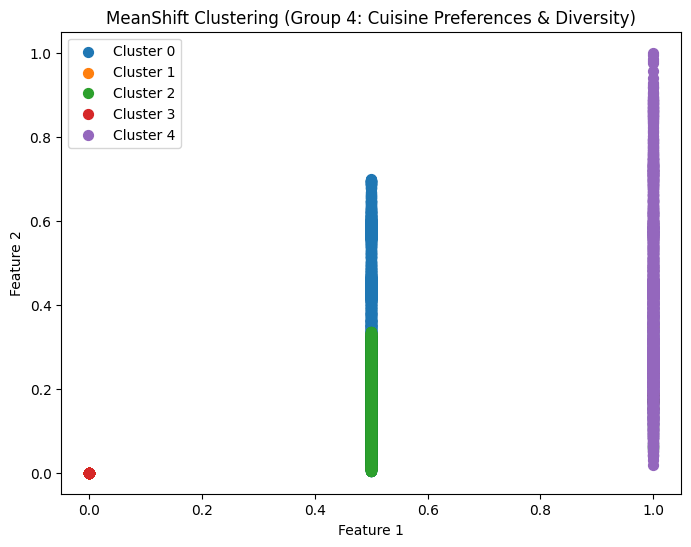

In [58]:
# Estimate bandwidth
bandwidth = estimate_bandwidth(group_4, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
group_4['mean_shift_cluster'] = mean_shift.fit_predict(group_4)

# Count clusters
n_clusters = len(np.unique(group_4['mean_shift_cluster']))
print(f"Group 4 (Cuisine Preferences & Diversity) - Number of clusters identified by MeanShift: {n_clusters}")

# Plot MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_4['mean_shift_cluster']):
    cluster_points = group_4[group_4['mean_shift_cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 4: Cuisine Preferences & Diversity)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


DBSCAN

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_23160\2062467492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['dbscan_cluster'] = dbscan.fit_predict(group_4)


Group 4 (Cuisine Preferences & Diversity) - Number of clusters identified by DBSCAN: 8


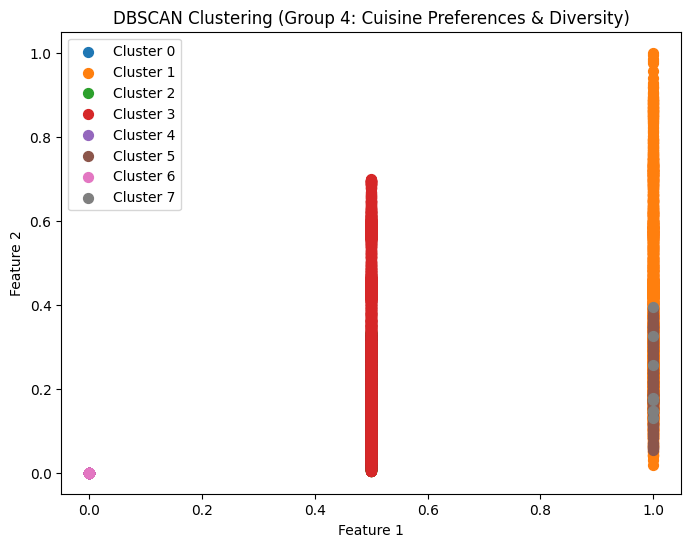

In [59]:
# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_4['dbscan_cluster'] = dbscan.fit_predict(group_4)

# Count clusters (excluding noise)
n_clusters = len(np.unique(group_4['dbscan_cluster'])) - (1 if -1 in group_4['dbscan_cluster'] else 0)
print(f"Group 4 (Cuisine Preferences & Diversity) - Number of clusters identified by DBSCAN: {n_clusters}")

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_4['dbscan_cluster']):
    if cluster == -1:
        cluster_points = group_4[group_4['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_4[group_4['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 4: Cuisine Preferences & Diversity)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


t-SNE

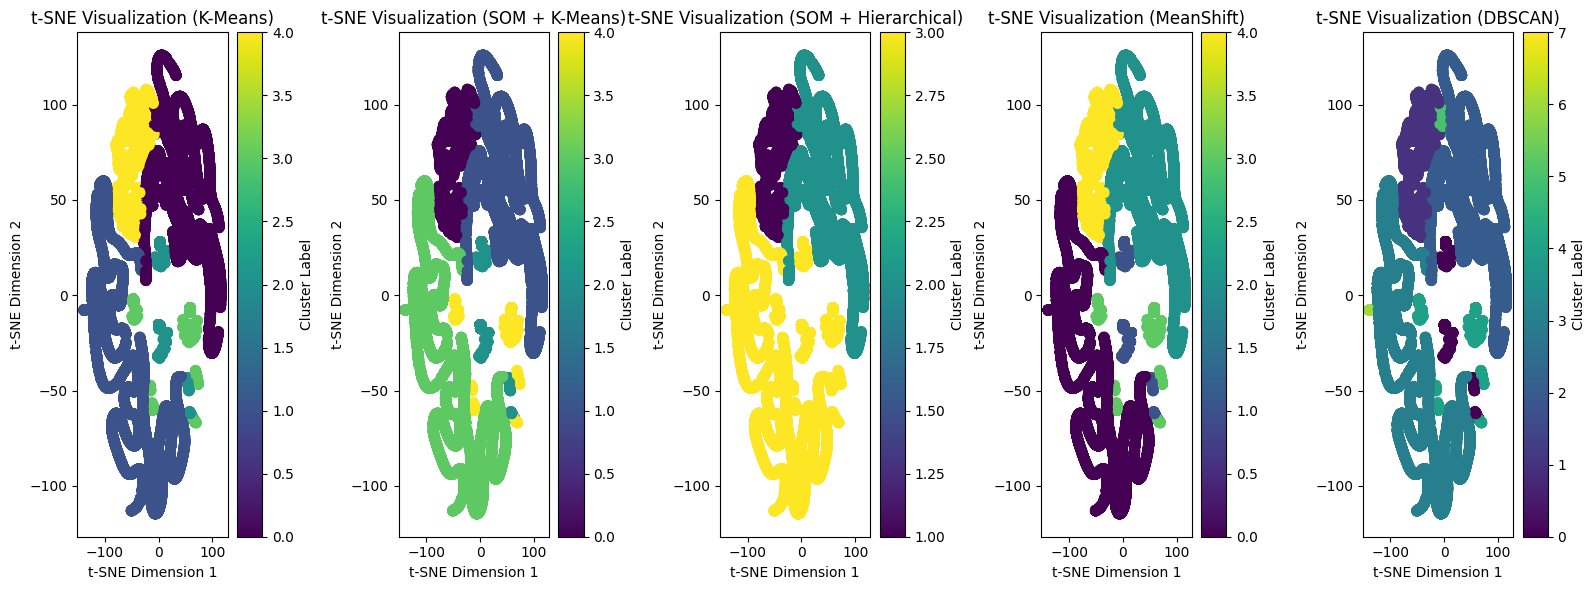

In [60]:
# Update cluster_results for group_4
cluster_results_group_4 = {
    'K-Means': group_4['kmeans_cluster'].values,
    'SOM + K-Means': group_4['som_cluster'].values,
    'SOM + Hierarchical': group_4['som_hierarchical_cluster'].values,
    'MeanShift': group_4['mean_shift_cluster'].values,
    'DBSCAN': group_4['dbscan_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_4_tsne = tsne.fit_transform(group_4.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_4), figsize=(16, 6))
if len(cluster_results_group_4) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_4.items()):
    scatter = axes[i].scatter(group_4_tsne[:, 0], group_4_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()